# Logistic Regression

In [22]:
import io, os, sys, types
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [23]:
import nbformat

from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell

In [24]:
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path
    
    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [25]:
class NotebookLoader(object):
    """Module Loader for IPython Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path
    
    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)
        
        print ("importing notebook from %s" % path)
                                       
        # load the notebook object
        nb = nbformat.read(path, as_version=4)
        
        
        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod
        
        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__
        
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

In [26]:
class NotebookFinder(object):
    """Module finder that locates IPython Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [27]:
sys.meta_path.append(NotebookFinder())

In [28]:
import EDA

In [29]:
EDA.final_data.columns.values


array(['Date', 'Block', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Station', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise',
       'Sunset', 'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS', 'Street_  W ARMITAGE AVENUE',
       'Street_ E 105TH ST', 'Street_ E 111TH ST', 'Street_ E 115TH ST',
       'Street_ E 118TH ST', 'Street_ E 130TH ST', 'Street_ E 138TH ST',
       'Street_ E 67TH ST', 'Street_ E 91ST PL', 'Street_ E 91ST ST',
       'Street_ E RANDOLPH ST', 'Street_ N ASHLAND AVE',
       'Street_ N ASHLAND AVE OVERPASS', 'Street_ N AUSTIN AVE',
       'Street_ N AVONDALE AVE', 'Street_ N CALIFORNIA A

## Create cross validation sets

In [30]:
# set the target variable
target = 'WnvPresent'

#EDA.final_data

#list(EDA.final_data.columns.values)

# Set X and y
X = EDA.final_numeric_data.drop([target], axis=1)
y = EDA.final_numeric_data[target]

#EDA.final_data

print X



       Block   Latitude  Longitude  AddressAccuracy  NumMosquitos  Station  \
0         41  41.954690 -87.800991                9             1        1   
1         41  41.954690 -87.800991                9             1        2   
2         41  41.954690 -87.800991                9             1        1   
3         41  41.954690 -87.800991                9             1        2   
4         62  41.994991 -87.769279                9             1        1   
5         62  41.994991 -87.769279                9             1        2   
6         79  41.974089 -87.824812                8             1        1   
7         79  41.974089 -87.824812                8             1        2   
8         79  41.974089 -87.824812                8             4        1   
9         79  41.974089 -87.824812                8             4        2   
10        15  41.921600 -87.666455                8             2        1   
11        15  41.921600 -87.666455                8             

In [31]:
# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

## Build a model

In [32]:
# Instantiate logistic regression classifier using default params
lm = linear_model.LogisticRegression()

# Train logistic regression classifier on training set
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluate te Model

In [33]:
# Check model accuracy on test set
print "Accuracy: %0.3f" % lm.score(X_test, y_test)

Accuracy: 0.946


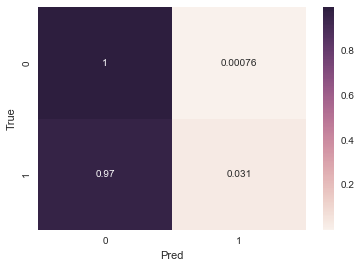

Confusion Matrix:
[[7941    6]
 [ 444   14]]


In [34]:
# Get confusion matrix on test set
y_pred = lm.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

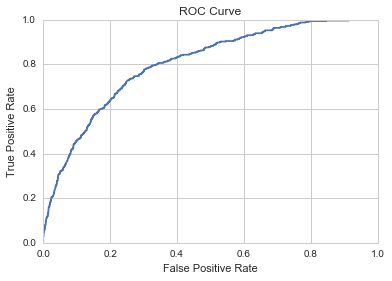

ROC AUC: 0.802


In [35]:
# Plot ROC curve and get AUC score
y_pred_proba = lm.predict_proba(X_test)[:,1]

# Determine the false positive and true positive rates
fpr, tpr, t = metrics.roc_curve(y_test, y_pred_proba)

 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Get ROC AUC score
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, y_pred_proba)

## Tune the model

In [36]:
# Set list of values to grid search over
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
s = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
params = {'C': c, 'solver':s}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=linear_model.LogisticRegression(),
    param_grid=params)
gs.fit(X_train, y_train)

# Get best value to use
#print "Best Params:"
#print gs.best_params_

# Get improvement
#print "Accuracy of current model: %0.3f" % lm.score(X_test, y_test)
#print "Accuracy using best param: %0.3f" % gs.best_score_

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [37]:
# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % lm.score(X_test, y_test)
print "Accuracy using best param: %0.3f" % gs.best_score_

Best Params:
{'C': 0.1, 'solver': 'liblinear'}
Accuracy of current model: 0.946
Accuracy using best param: 0.949


## Update parameters

In [38]:
# Current model params
print lm
print "Accuracy of current model: %0.3f" % lm.score(X_test, y_test)

# Update model params
lm.set_params(C=0.1)
lm.set_params(solver='newton-cg')

# Retrain model on new params
lm.fit(X_train, y_train)

# Updated model params
print lm
print "Accuracy of updated model: %0.3f" % lm.score(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy of current model: 0.946
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy of updated model: 0.946


## Present the Results

In [39]:
# load data
EDA.final_numeric_data.head()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,...,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,41,41.954690,-87.800991,9,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41,41.954690,-87.800991,9,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,41.954690,-87.800991,9,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41,41.954690,-87.800991,9,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62,41.994991,-87.769279,9,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_train = EDA.final_numeric_data

In [41]:
# Set target variable name
target = 'WnvPresent'

# Set X_train and y_train
X_train = df_train.drop([target], axis=1)
y_train = df_train[target]

In [43]:
# Build tuned model 

lm = linear_model.LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

# Train tuned model
lm.fit(X_train, y_train)

# Score tuned model
print "Accuracy: %0.3f" % lm.score(X_train, y_train)

Accuracy: 0.948


## Use trained model to generate a few summary findings

In [44]:
# Generate probabililty of virus present using trained model 
df_train['Probability'] = lm.predict_proba(X_train)[:,1]

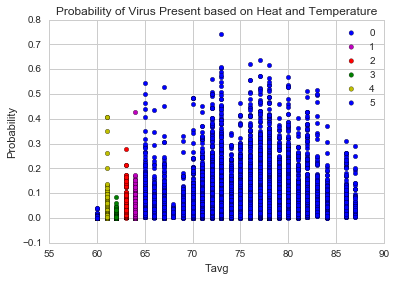

In [55]:
# Plot Probability of virus present based on temperature and heat
ax = df_train[df_train['Heat']==0].plot(x='Tavg', y='Probability', kind='scatter', color='b', label='0')
df_train[df_train['Heat']==1].plot(ax=ax, x='Tavg', y='Probability', kind='scatter', color='m', label='1')
df_train[df_train['Heat']==2].plot(ax=ax, x='Tavg', y='Probability', kind='scatter', color='r', label='2')
df_train[df_train['Heat']==3].plot(ax=ax, x='Tavg', y='Probability', kind='scatter', color='g', label='3')
df_train[df_train['Heat']==4].plot(ax=ax, x='Tavg', y='Probability', kind='scatter', color='y', label='4')
df_train[df_train['Heat']==5].plot(ax=ax, x='Tavg', y='Probability', kind='scatter', color='b', label='5')
ax.set(title='Probability of Virus Present Based on Heat and Temperature')

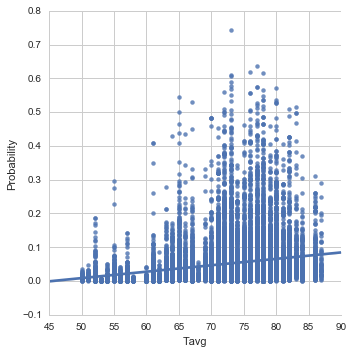

In [56]:
# Plot Probability of virus present based on Pclass and Age
sns.lmplot(x="Tavg", y="Probability", data=df_train)